In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast
from google.colab import files

sns.set()

In [215]:
#pip install -U plotly

In [214]:
#!pip install ipywidgets

In [2]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.4.0


In [3]:
df_trees = pd.read_csv("/cleaned_tree_data_5.csv", encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [216]:
df_trees['neighborhood'].unique()

In [5]:
df_height = df_trees.groupby("neighborhood")["height"].mean()
df_height = df_height.to_frame().reset_index()
df_height.columns = ['neighborhood', 'average_height']
df_height

,neighborhood,average_height
0,Allegheny Center,21.697225
1,Allegheny West,22.656178
2,Allentown,19.034898
3,Arlington,18.917664
4,Arlington Heights,42.748561
...,...,...
85,Upper Lawrenceville,23.099635
86,West End,20.215296
87,West Oakland,15.463468
88,Westwood,28.845386


In [55]:
fig=px.choropleth(df_height,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='average_height',
              color_continuous_scale='Inferno',
               title='Average Tree Height across Neighborhood' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [8]:
df_width = df_trees.groupby("neighborhood")["width"].mean()
df_width = df_width.to_frame().reset_index()
df_width.columns = ['neighborhood', 'average_width']
df_width

,neighborhood,average_width
0,Allegheny Center,6.741885
1,Allegheny West,7.798702
2,Allentown,7.388842
3,Arlington,5.454705
4,Arlington Heights,11.448097
...,...,...
85,Upper Lawrenceville,9.255260
86,West End,6.650729
87,West Oakland,5.624245
88,Westwood,8.918861


In [54]:
fig=px.choropleth(df_width,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='average_width',
              color_continuous_scale='hot',
               title='Average Tree Width across Neighborhood' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [217]:
groupBySpeciesAndNeighborhood = df_trees.groupby(['neighborhood','scientific_name'])['id'].count()
groupBySpeciesAndNeighborhood = groupBySpeciesAndNeighborhood.to_frame().reset_index()
prevalent_species = groupBySpeciesAndNeighborhood.loc[groupBySpeciesAndNeighborhood.groupby(['neighborhood'])['id'].idxmax()].reset_index(drop=True)
prevalent_species

,neighborhood,scientific_name,id
0,Allegheny Center,Platanus x acerifolia,109
1,Allegheny West,Pyrus calleryana,44
2,Allentown,Pyrus calleryana,14
3,Arlington,Tsuga canadensis,14
4,Arlington Heights,Robinia pseudoacacia,2
...,...,...,...
85,Upper Lawrenceville,Pyrus calleryana,65
86,West End,Pyrus calleryana,46
87,West Oakland,Gleditsia triacanthos inermis,17
88,Westwood,Tilia cordata,29


In [40]:
fig=px.choropleth(prevalent_species,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='scientific_name',
              color_continuous_scale='Inferno',
               title='Most prevalent species in each Neighborhood' ,  
               height=700
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [84]:
import ipywidgets as widgets
from IPython.display import display
selected_spec = widgets.Dropdown(options = sorted(df_trees.scientific_name.unique()), value=None, description='Species:')
display(selected_spec)

Dropdown(description='Species:', options=('Abies balsamea', 'Abies concolor', 'Abies fraseri', 'Acer buergeria…

In [191]:
df_spec = df_trees.groupby(['scientific_name', 'neighborhood'])['id'].count()
df_spec = df_spec.to_frame().reset_index()
df_spec = df_spec.loc[df_spec['scientific_name'] == selected_spec.value]
#df_spec['percent'] = ((df_spec['id']/df_spec['id'].sum()) * 100)
df_spec

,scientific_name,neighborhood,id
0,Abies balsamea,Highland Park,1
1,Abies balsamea,Point Breeze,1
2,Abies balsamea,Squirrel Hill South,3
3,Abies balsamea,Troy Hill,1
4,Abies balsamea,Westwood,1


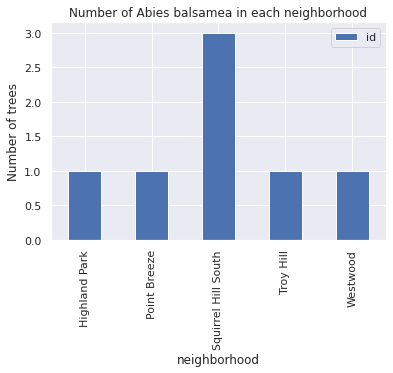

In [213]:
str1 = "Number of " + str(selected_spec.value) + " in each neighborhood"
ax = df_spec.plot.bar(x='neighborhood', y='id', rot='vertical', ylabel = 'Number of trees', title= str1)


In [195]:
full_neigh = pd.DataFrame({'neighborhood' : df_trees['neighborhood'].unique()})
full_neigh = full_neigh.merge(df_spec, how = 'outer', on = ['neighborhood'])
full_neigh['id'] = full_neigh['id'].fillna(0)
full_neigh = full_neigh.rename(columns={"id": "count"})
full_neigh = full_neigh.drop('scientific_name', 1)

In [194]:
fig=px.choropleth(full_neigh,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='count',
              color_continuous_scale= 'blues',
               title='Most prevalent species in each Neighborhood' ,  
               height=700,
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.layout.template = None
fig.show()